# Introduction to K-Nearest Neighbors

## Introduction to the Dataset

In the previous lesson, we looked at the machine learning workflow and trained a simple classifier to predict if a patient has breast cancer. We learned how we can quickly prototype a machine learning model and experiment with it to get reasonable results.

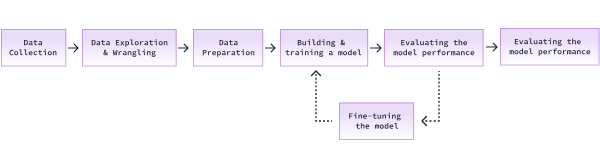

While there is a benefit to being able to quickly experiment and iterate, not understanding how the algorithm for a model actually works can impact the outcome of those random experiments.

In this lesson, we'll learn a different machine learning algorithm and implement it from scratch. We'll use it to build and train a classifier that can predict whether a bank customer will subscribe to a term deposit or not.

We'll use a modified version of the [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). It contains data on customers of a Portuguese banking institution that ran marketing campaigns to assess whether customers would subscribe to their product. The dataset consists of 21 columns, including the target variable:



- age: (numeric)
- job: type of job (categorical: 'admin','blue collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric).
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)
- y: has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
banking_df = pd.read_csv('../../Datasets/subscription_prediction.csv')
banking_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Select the categorical features
banking_df.select_dtypes(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
2,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,nonexistent,no
3,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,nonexistent,no
4,management,single,basic.9y,unknown,no,no,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
10117,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,nonexistent,no
10118,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes
10119,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
10120,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [4]:
# select numerical values
banking_df.select_dtypes(exclude='O')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,57,293,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,39,195,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
10117,64,151,3,999,0,-1.1,94.767,-50.8,1.028,4963.6
10118,37,281,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
10119,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
10120,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [5]:
banking_df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [6]:
banking_df.shape

(10122, 21)

In [7]:
# check misssing values
banking_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
banking_df['y'].value_counts()

y
no     5482
yes    4640
Name: count, dtype: int64

In [9]:
banking_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000,10122.000000
mean,40.313673,373.414049,2.369789,896.476882,0.297471,-0.432671,93.492407,-40.250573,3.035134,5138.838975
std,11.855014,353.277755,2.472392,302.175859,0.680535,1.714657,0.628615,5.271326,1.884191,85.859595
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,140.000000,1.000000,999.000000,0.000000,-1.800000,92.963000,-42.700000,1.252000,5076.200000
50%,38.000000,252.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.076000,5191.000000
75%,48.000000,498.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## K-Nearest Neighbors (k-NN)

Upon exploring the data, we discovered that the dataset has:

- 10122 observations, 20 features, and 1 target variable.
- No missing values in the dataset.
- 5482 customers who didn't subscribe and 4640 who did.
- 10 categorical columns and 10 numeric columns, excluding the target column.

If we explore our dataset further, we could ask several questions to better analyze it. For example:

- How many customers under the age of 30 subscribed to the product?
- Were the customers who subscribed contacted more often than those who weren't during the marketing campaign?
- Which customers were contacted more often before this campaign?

We could potentially answer each of these questions ourselves and develop a complex set of rules that could tell us which customers are likely to subscribe given all the features available to us.



Let's look at a visual representation of the above. The following plot depicts customers who subscribed (purple) and those who didn't (blue). Our two axes correspond to two features. For example, one could be age and another campaign.

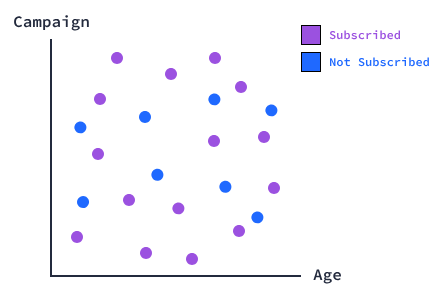

Each customer is a data point in a 2-dimensional feature space and is defined by two numerical values. If we know the age of a customer and how many times they were contacted during the campaign, we can locate that point in that space.

The proximity of those customers in the feature space can tell us how similar they are to one another in relation to their label. For example, let's say that 3 out of 5 customers who are 30 to 32 years old and were contacted 2 to 4 times during the campaign subscribed to the product. In the plot, the data points for those customers would be relatively close to one another. We could say that customers within that age and campaign range of values are more likely to subscribe to the bank's product.

That's the kind of rule we could develop through our analysis and by looking at the data points in the feature space.

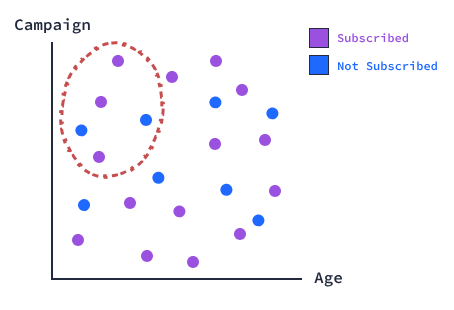

What if we add another customer (blue dot) to our feature space above?

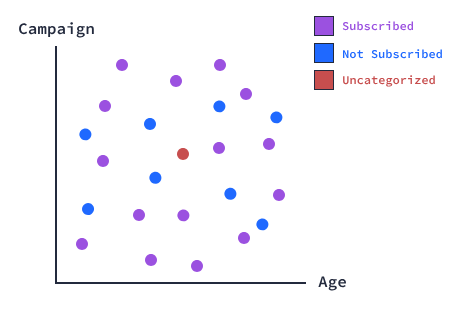

How can we predict if this new customer is going to subscribe, given just those two features?

With what we learned above, we can calculate the distance of that blue dot from all the other points and look at the ones closest to it. If a majority of the points closest to it are purple, we can classify the new point as purple. If they are blue, we can classify it as blue.

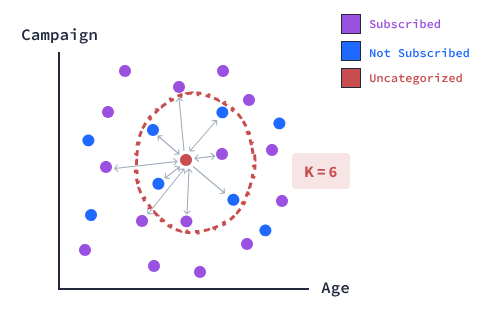

By looking at how closely-related those data points are in context of their labels, we are allowing those rules, like the ones we mentioned above, to develop on their own. This is the K-Nearest Neighbors algorithm.

1. For an unseen data point, the algorithm calculates the distance between that point and all the observations across all features in the training dataset.

2. It sorts those distances in ascending order.

3. It selects 
K
 observations with the smallest distances from the above step. These 
K
 observations are the K-nearest neighbors of that unseen data point.

Note that there should be at least 
K
≥
1
 observations in the dataset.

It calculates which labels of those neighbors is the most common, and assigns that label to the unseen data point.

Before we implement the algorithm, let's prepare our data.

## Data Preparation

When we explored our data, we noticed that our target column, y, stores the labels as yes or no strings. While those are reasonable categories and we can continue working with them as is, we'll encode those strings as the numbers 0 for no and 1 for yes.

In the previous lesson, we learned how to split the dataset into a training and test set. Instead of using scikit-learn's `train_test_split()` function, we'll implement the split ourselves. We'll opt for a `85-15%` split.

In order to split the dataset, we could take a direct approach of selecting the first N observations as the training set and the rest as the test set. But that poses a problem.  We don't know how many observations of those N have a label of 0 and how many have a label of 1.

Let's say N = 100. What if, out of those 100, only 5 observations had a label of 1?

When the dataset is imbalanced, a machine learning model might struggle to accurately predict the labels because it hasn't had enough information to learn to distinguish between the classes. Ideally, the model should have enough data corresponding to each class so it can learn from the data effectively.

Even though our dataset has a reasonably balanced class distribution, we need to make sure that both the train and test sets have a similar percentage of subscribed customers.

The data collection process can also introduce certain biases. It's possible that the clients were selected in a specific order. For example, the collection process could've added the newest clients first. If we were to select the first N observations, we could be introducing bias into our model. That's why, when creating our training and test sets, randomly selecting observations is important, as it can help reduce any such biases.

Fortunately for us, this isn't complicated to implement in pandas.

In [10]:
banking_df['y'] = banking_df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Randomize the sample
train_df = banking_df.sample(frac=0.85,random_state=417)
test_df = banking_df.drop(train_df.index)

In [11]:
banking_df['y'].value_counts(normalize=True) * 100

y
0    54.159257
1    45.840743
Name: proportion, dtype: float64

In [12]:
train_df['y'].value_counts(normalize=True) * 100

y
0    54.009763
1    45.990237
Name: proportion, dtype: float64

In [13]:
test_df['y'].value_counts(normalize=True) * 100

y
0    55.006588
1    44.993412
Name: proportion, dtype: float64

In [14]:
X_train = train_df.drop('y', axis=1)
X_test = test_df.drop('y', axis=1)
y_train = train_df['y']
y_test = test_df['y']

## k-NN for One Feature

Now that we have our training and test sets, we can implement our algorithm!

Before we begin, we need to select a `distance metric` to calculate the distance between observations.

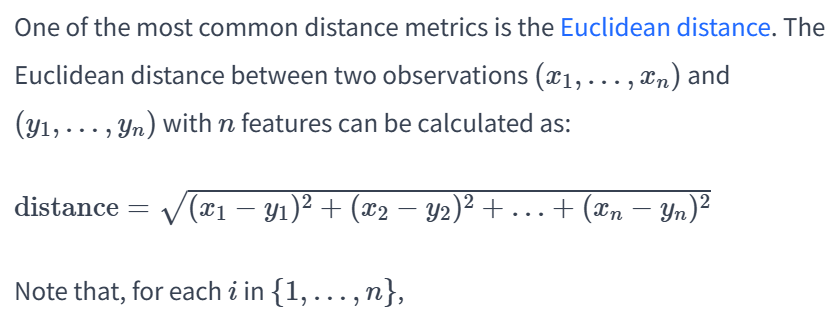s:

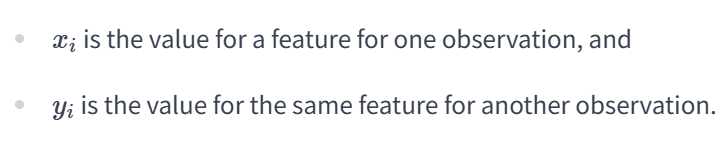

When we are working with only one feature, the above formula simplifies to:

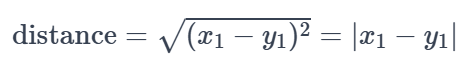

We'll implement our algorithm with this distance metric. You're encouraged to learn about some of the other distance metrics that can be used as well:

- [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry)
- [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance)
- [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance)

As per the algorithm, we'll calculate how far an unseen observation is from all the observations in the training data for a specific feature.

But wait a minute. We learned that a machine learning model is trained over some data and then the trained model can be used to classify unseen data.

Why are we using an unseen observation to implement the k-NN algorithm? Aren't we training the model using unseen data?

K-nearest neighbors is a bit of a unique case. It works at the time of prediction and it doesn't technically have a "training phase." The model classifies every new input by comparing it to its neighbors. Those neighbors are from the training set.

As a result, the algorithm can be time-consuming depending on the number of observations and features in our dataset.

So why did we have to create a separate test set?

Even though there's no training phase, the algorithm does rely on an unseen observation to be able to make a prediction. In the next exercise, we'll use a random value from our test set to implement the algorithm.

In [113]:
def knn(feature, single_test_input, k):
    X_train['distance'] = abs(X_train[feature] - single_test_input[feature])
    prediction = y_train[X_train['distance'].nsmallest(n=k).index].mode()[0]
    return prediction

In [120]:
feature = 'age'
knn('age', X_test, k=3)

0

In [118]:
knn(feature, test, 3)

1

## Evaluating the Model

On the previous screen, we implemented the algorithm and used it to classify a sample input from the test set.

We'll now evaluate our model's performance by calculating how accurately it is able to correctly classify a given value. We can calculate the accuracy by comparing how many predictions the model gets correct compared to the total number of predictions.

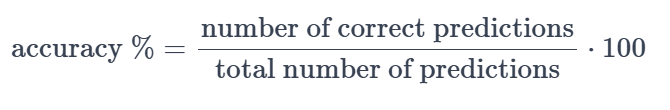

In order to do that, we'll classify every data point in our test set and compare the predictions to the actual labels for those data points.

In [128]:
X_test['age_predicted_y'] = X_test.apply(lambda x: knn('age', x, k=3), axis=1)

In [133]:
correct_preds = (X_test['age_predicted_y'] == y_test).sum()
total = X_test.shape[0]
accuracy = correct_preds / total
accuracy

0.538866930171278

In [138]:
model_accuracy = (X_test["age_predicted_y"] == y_test).value_counts(normalize=True)[True]*100
print(f"Accuracy of model trained on the column 'age': {model_accuracy:.2f}%")

Accuracy of model trained on the column 'age': 53.89%


In [136]:
# using the campgain feature

X_test['campaign_predicted_y'] = X_test.apply(lambda x: knn('campaign', x, k=3), axis=1)

model_accuracy = (X_test["campaign_predicted_y"] == y_test).value_counts(normalize=True)[True]*100
print(f"Accuracy of model trained on the column 'campaign': {model_accuracy:.2f}%")

Accuracy of model trained on the column 'campaign': 55.14%


In [137]:
(X_test["campaign_predicted_y"] == y_test).value_counts(normalize=True)

True     0.551383
False    0.448617
Name: proportion, dtype: float64

## Feature Engineering I

For a single feature, age, our model got an accuracy of ~54%! It's not performing too well.

Fortunately, we don't have to rely on using just one feature at a time. We can use multiple at the same time, which might improve our model's performance.

When building machine learning models, we'll often have to transform features so they can be effectively used to train models and yield better performance. The process of transforming those features is called feature engineering. Feature engineering will often be part of the data preparation step of the machine learning workflow.

We'll work through a couple of commonly used techniques in this lesson.

Both age and campaign are numerical features. There are several categorical variables in our data set as well. However, all the categorical variables in our data set contain string values.

We can't calculate the distance between two strings. That's another limitation of the k-nearest neighbor algorithm. We can work around it without much effort.

Just like we encoded the yes and no values as 0 and 1 for our target variable, we can encode our categorical features.

What values could we use for the categories in the marital column, for example? Maybe 1 to 4 for all 4 categories?

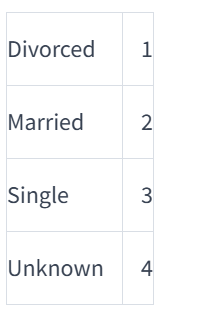

While that sounds like a good approach, it's not suitable in practice.

We're calculating the distance between the feature(s) of two observations. By assigning each category a unique number, we're inadvertently turning the feature into an ordinal variable. The distance between a 4 and a 1 is higher than that between a 1 and a 2, even though there is no inherent order or rank to those categories.

An alternative approach is to convert each category into its own column. For every observation in each column, we set a binary value, 0 or 1, for that observation, depending on how the observation was originally categorized.

This is what the outcome would look like:

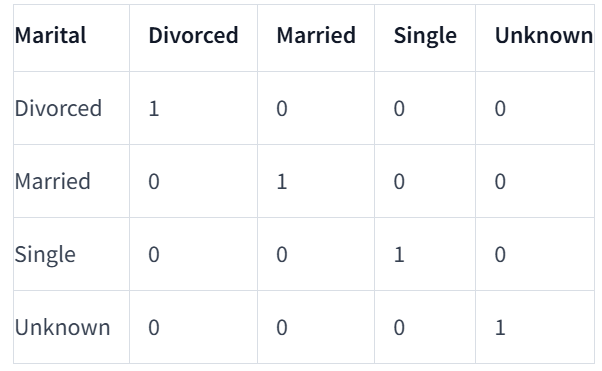

Each row above represents an observation. The Marital column lists the category for each observation. The rest of the columns store a 0 or 1, depending on the category for that observation.

This process is known as one-hot encoding. The new columns that get created in this process are called dummy variables.

There are two ways we can implement one-hot encoding. We discussed the first way above. The second way is to drop the first category encountered when performing one-hot encoding instead of creating a dummy variable for it. This is possible because we can encode n categories of a categorical column with just n-1 dummy variables. Using this approach, any observation with a 0 for each dummy variable indicates that the observation belongs to the category that's been dropped. For example, if Unknown is the first category encountered in the Marital column, it will be dropped and produce the following table:

Notice how the Unknown observation has a 0 value for each dummy variable created. This shows us how four categories can be encoded with just three dummy variables.

We will convert the marital categorical column in our dataset to dummy variables using the second approach.

In [164]:
banking_df_copy = banking_df.copy()
banking_df_copy = pd.get_dummies(banking_df_copy, columns=['marital'], drop_first=True, dtype=int)

## k-NN for Multiple Features

We'll now implement the k-nearest neighbor algorithm for multiple features.

The only change we need to make is to our distance calculation. As we discussed on the fourth screen, the Euclidean distance for 
n
 features is calculated as:

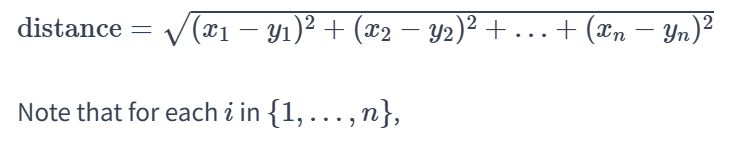

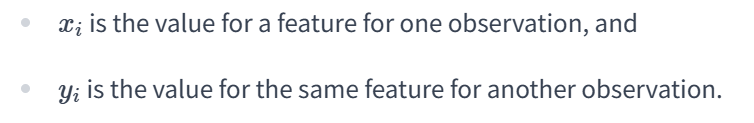

We'll modify our knn() function to account for this and select the following features for the model:

- age
- campaign
- marital_married
- marital_single

In [198]:
from sklearn.model_selection import train_test_split
X = banking_df_copy.drop('duration', axis=1)
y = banking_df_copy['duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=417)

In [199]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7591, 22), (2531, 22), (7591,), (2531,))

In [200]:
X_test

,age,job,education,default,housing,loan,contact,month,day_of_week,campaign,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_married,marital_single,marital_unknown
7472,38,technician,university.degree,no,yes,no,cellular,may,tue,2,...,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,0,1,0,0
3408,55,retired,high.school,no,yes,yes,cellular,jul,tue,3,...,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0,1,0,0
5851,29,technician,university.degree,no,no,yes,cellular,apr,mon,1,...,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0
9132,80,retired,basic.4y,no,yes,yes,cellular,apr,wed,2,...,nonexistent,-1.8,93.749,-34.6,0.642,5008.7,1,0,0,0
3790,45,blue-collar,basic.4y,no,no,no,cellular,aug,fri,2,...,nonexistent,1.4,93.444,-36.1,4.966,5228.1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6460,32,admin.,university.degree,no,yes,yes,cellular,may,thu,1,...,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0,0,1,0
8588,34,admin.,university.degree,no,no,no,cellular,oct,thu,1,...,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,1,1,0,0
5614,32,unemployed,university.degree,no,no,no,cellular,apr,wed,1,...,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,1,0,1,0
8205,87,retired,basic.4y,no,no,no,cellular,aug,fri,1,...,nonexistent,-2.9,92.201,-31.4,0.849,5076.2,1,0,0,0


In [224]:
def knn(features, single_test_input, k):
    X_train['distance'] = sum([(X_train[feature] - single_test_input[feature]) ** 2 for feature in features]) ** 0.5
    # prediction = y_train[X_train['distance'].nsmallest(n=k).index].mean() for regression
    prediction = y_train[X_train['distance'].nsmallest(n=k).index].mode()[0]
    return prediction

In [220]:
sum([2, 3])

5

In [221]:
features = ['age', 'campaign', 'marital_married', 'marital_single']

In [222]:
y_preds = X_test.head().apply(lambda x: knn(features, x, k=3), axis=1)

In [223]:
y_preds

7472    650.666667
3408    160.000000
5851    380.000000
9132    299.333333
3790    462.000000
dtype: float64

In [218]:
y_test.head()

7472    118
3408    394
5851    222
9132    654
3790    507
Name: duration, dtype: int64